Run the following cells, and provide the path to your images on the final line of the notebook.

In [74]:
from torchvision.transforms import ToTensor, Normalize, Compose
import matplotlib.pyplot as plt
import torch
import cv2

In [73]:
# Instantiate the model
import sys
sys.path.insert(0, './model')
from capsuleNet import CapsNet

capsule_net = CapsNet()

# Load the saved model parameters
model_path = "model/capNet.pth"
model_parameters = torch.load(model_path, map_location=torch.device('cpu'))

# Apply parameters to model
capsule_net.load_state_dict(model_parameters)

<All keys matched successfully>

The predicted class is: 5


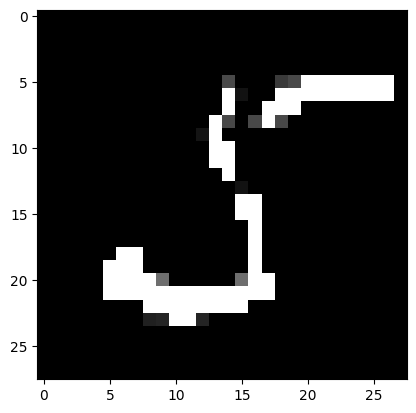

In [75]:


# Define the transformation
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

def resize_to_28x28(img):
    # Resize the image to 28x28 pixels
    # Invert the colors of the image
    img = cv2.bitwise_not(img)
    img = cv2.resize(img, (28, 28))
    return img

def run_inference(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply a threshold to the image
    _, img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

    # Resize the image to 28x28
    img = resize_to_28x28(img)

    # Convert the image to a PyTorch tensor and normalize it
    img_tsr = transform(img)
   
    # Add an extra dimension for the batch size
    img_tsr = img_tsr.unsqueeze(0)

    # Run the model on the tensor
    output, _, _ = capsule_net(img_tsr)

    # Get the prediction
    prediction= output.norm(dim=2).argmax(dim=1)[0][0]
    print(f"The predicted class is: {prediction}")

    # Visualize the image
    plt.imshow(img, cmap='gray')
    plt.show()
# Run inference on an image
run_inference("images/5.png")  #<----- relative path to your cropped image